In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# ABOUT THIS NOTEBOOK

## Created for Kaggle playground series season 3, episode 21 - 8.26.23
## Part I
This notebooks will be in two sections 1) EDA and 2) Predictions, first will mostly consist of making plots and cleaning the data. And when the data is ready we can feed to the model to prediction.

In [3]:
df = pd.read_csv('sample_submission.csv')

In [4]:
df.head()

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.00,9.545,9.265,8.110,8.43,7.15,0.180,...,4.95,1.730,1.800,4.800,3.15,10.665,10.465,16.645,5.75,10.37
1,1,9.10,13.533,40.90,8.770,9.265,6.015,10.07,7.15,1.107,...,20.05,9.530,7.695,4.550,6.95,2.040,5.200,5.725,2.95,2.23
2,2,8.21,3.710,5.42,8.770,9.265,4.550,10.07,7.15,0.020,...,4.58,3.025,3.960,4.935,4.95,4.725,6.075,6.750,3.50,3.17
3,3,8.39,8.700,8.10,9.500,9.200,5.200,8.67,6.67,0.280,...,8.45,2.070,1.730,6.300,4.70,3.500,6.200,8.670,2.90,7.37
4,4,8.07,8.050,8.65,7.960,9.265,3.290,10.07,7.15,0.360,...,2.02,1.730,0.760,4.800,4.97,3.950,2.800,8.400,3.50,3.90


In [5]:
df.isna().any()

id        False
target    False
O2_1      False
O2_2      False
O2_3      False
O2_4      False
O2_5      False
O2_6      False
O2_7      False
NH4_1     False
NH4_2     False
NH4_3     False
NH4_4     False
NH4_5     False
NH4_6     False
NH4_7     False
NO2_1     False
NO2_2     False
NO2_3     False
NO2_4     False
NO2_5     False
NO2_6     False
NO2_7     False
NO3_1     False
NO3_2     False
NO3_3     False
NO3_4     False
NO3_5     False
NO3_6     False
NO3_7     False
BOD5_1    False
BOD5_2    False
BOD5_3    False
BOD5_4    False
BOD5_5    False
BOD5_6    False
BOD5_7    False
dtype: bool

OK we don't have any null or na values.

### The official kaggle explanation
> This is a very different type of challenge! For this challenge, your task is to improve a dataset that is being used to train a random forest model; in other words, your submission will be training data, not predictions. A random forest model will be trained on your submission, used to make predictions, and then those predictions will be used to generate your score.

> The dataset for this competition is a synthetic dataset based off of the Dissolved oxygen prediction in river water dataset. You are free to use the original in any way that you find useful.

> Please see important information on the Evaluation tab about the model that will be trained on your submitted data.

> Good luck!

Now we have the current dataset which has only data from 7 stations and it is used to build a random forest model. __So first we need to create a Random Forest to compare the output__ and then augment the data by adding 8th station to df and running it again by the same random forest (or another) to see the differences.

Let's create a random forest model.

In [6]:
indicators = ['O2', 'NH4', 'NO2', 'NO3', 'BOD5']

In [7]:
def get_seven_stations(indicator):
    col_names = [indicator + '_' + str(i) for i in range(1, 8)]
    return col_names

In [8]:
get_seven_stations(indicators[4])

['BOD5_1', 'BOD5_2', 'BOD5_3', 'BOD5_4', 'BOD5_5', 'BOD5_6', 'BOD5_7']

In [9]:
oxgen_col = get_seven_stations(indicators[0])

In [10]:
df[oxgen_col]

,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7
0,7.500,9.000,9.545,9.265,8.110,8.430,7.150
1,13.533,40.900,8.770,9.265,6.015,10.070,7.150
2,3.710,5.420,8.770,9.265,4.550,10.070,7.150
3,8.700,8.100,9.500,9.200,5.200,8.670,6.670
4,8.050,8.650,7.960,9.265,3.290,10.070,7.150
...,...,...,...,...,...,...,...
3495,6.250,8.300,7.795,9.265,5.690,8.555,6.335
3496,6.630,6.630,8.370,7.600,0.636,8.430,7.150
3497,8.367,8.433,8.770,6.170,5.800,10.400,7.200
3498,10.000,6.630,9.545,9.265,3.290,8.980,2.310


In [11]:
np.corrcoef(df['O2_1'],df['O2_2'])

array([[1.        , 0.20475417],
       [0.20475417, 1.        ]])

In [12]:
def corr (x,y):
    return np.corrcoef(x, y) [0][1]

def show_corr(df, a, b):
    x,y = df [a], df[b]
    plt.scatter (x,y, alpha=0.5, s=4)
    plt.title(f'{a} vs {b}; r: {corr (x, y) : .2f}')

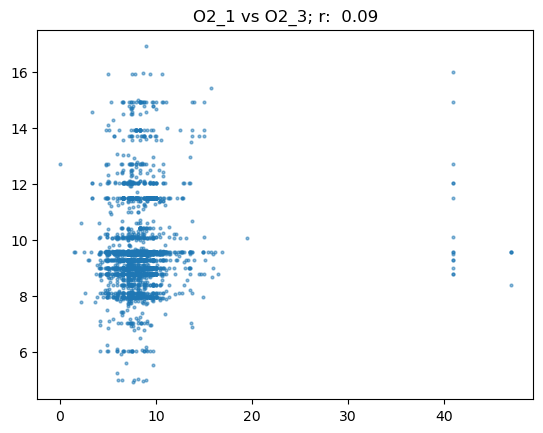

In [13]:
show_corr(df, 'O2_1','O2_3')

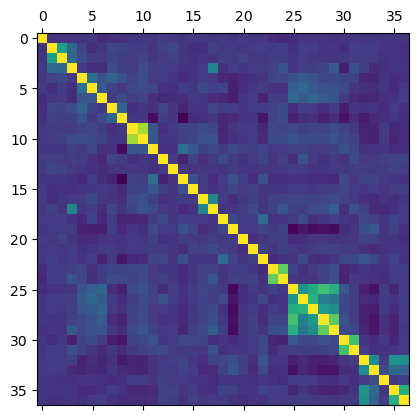

In [14]:
plt.matshow(df.corr())
plt.show()

I thought maybe there was a correlation between perhaps oxygen and nitrogen dioxide but there aren't any power connections, except for nitrate.

Let's check to TODO:

- [x] Look at the big picture.
- [x] Get the data.
- [x] Discover and visualize the data to gain insights.
- [ ] Prepare the data for Machine Learning algorithms.
- [ ] Select a model and train it.
- [ ] Fine-tune your model.
- [ ] Present your solution.
- [ ] ~~Launch, monitor, and maintain your system.~~

### NOTE
This is part is quite useful, since it was the part where I learnt how to index columns, obviuosly with iloc. I wonder if it is also possible with 'loc'?

Another way which I thought up was to select like `df.iloc[:, 0]` and `df.iloc[:, 2:37]` and then add them to a big X df. More info on column based indexing on [Pandas Site](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html).

In [15]:
inx = np.ones((37))

In [16]:
inx[1] = 0

In [17]:
x_full = df.iloc[:, inx == True]

In [18]:
y_full = df.iloc[:, 1]
y_full.any() != df['target'].any()

False

In [19]:
np.max(y_full)

65.93

In [20]:
np.min(y_full)

# TODO test normalization

1.3

In [21]:
# Splitting the data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)

In [86]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=1000, n_jobs=-1,
                      random_state=42)

In [88]:
from sklearn.metrics import mean_squared_error

for i in range(0, 5):
    x_train, x_test, y_train, y_test = train_test_split(x_full, y_full, test_size=0.2)
    
    rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

    rf.fit(x_train, y_train)

    rf_preds_train = rf.predict(x_train)
    rf_preds = rf.predict(x_test)
    mse_train = mean_squared_error(y_train, rf_preds_train)
    mse_test = mean_squared_error(y_test, rf_preds)

    print(f'MSE for training dataset [{i+1}] is: {mse_train}')
    print(f'MSE for test dataset [{i+1}] is: {mse_test}\n')

MSE for training dataset [1] is: 0.9151989353368198
MSE for test dataset [1] is: 1.4183081616612727

MSE for training dataset [2] is: 0.7208618594721672
MSE for test dataset [2] is: 5.279086094373523

MSE for training dataset [3] is: 0.6982857903096786
MSE for test dataset [3] is: 6.36036828282298

MSE for training dataset [4] is: 0.6861227958016543
MSE for test dataset [4] is: 6.304503296267733

MSE for training dataset [5] is: 0.6819109989172119
MSE for test dataset [5] is: 6.224094464318788



MSE for training dataset [1] is: 0.8866603327584299
MSE for test dataset [1] is: 1.5932736251233603

MSE for training dataset [2] is: 0.9360571125125997
MSE for test dataset [2] is: 1.1064419699076584

MSE for training dataset [3] is: 0.9078948819808679
MSE for test dataset [3] is: 1.276288024059143

MSE for training dataset [4] is: 0.9498894585142702
MSE for test dataset [4] is: 0.9498135555848811

MSE for training dataset [5] is: 0.7531009828761299
MSE for test dataset [5] is: 4.975854847543697


Error for training set is fairly the same in all 5 distributions of data, but MSE for test data set varys a lot.

In [89]:
len(y_test) == len(rf_preds)

True

In [90]:
err_values = []

for i in y_test:
    err = (y_test - rf_preds) ** 2
    err_values.append(err)
err

2866    1.801984
605     2.549054
1437    0.896783
3055    1.115724
1773    0.001120
          ...   
74      0.068898
323     7.894138
2851    7.455423
3355    0.151062
2380    0.001516
Name: target, Length: 700, dtype: float64

In [91]:
imporatnces = rf.feature_importances_

In [92]:
len(imporatnces)

36

([<matplotlib.axis.XTick at 0x7fec1b2573a0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35')])

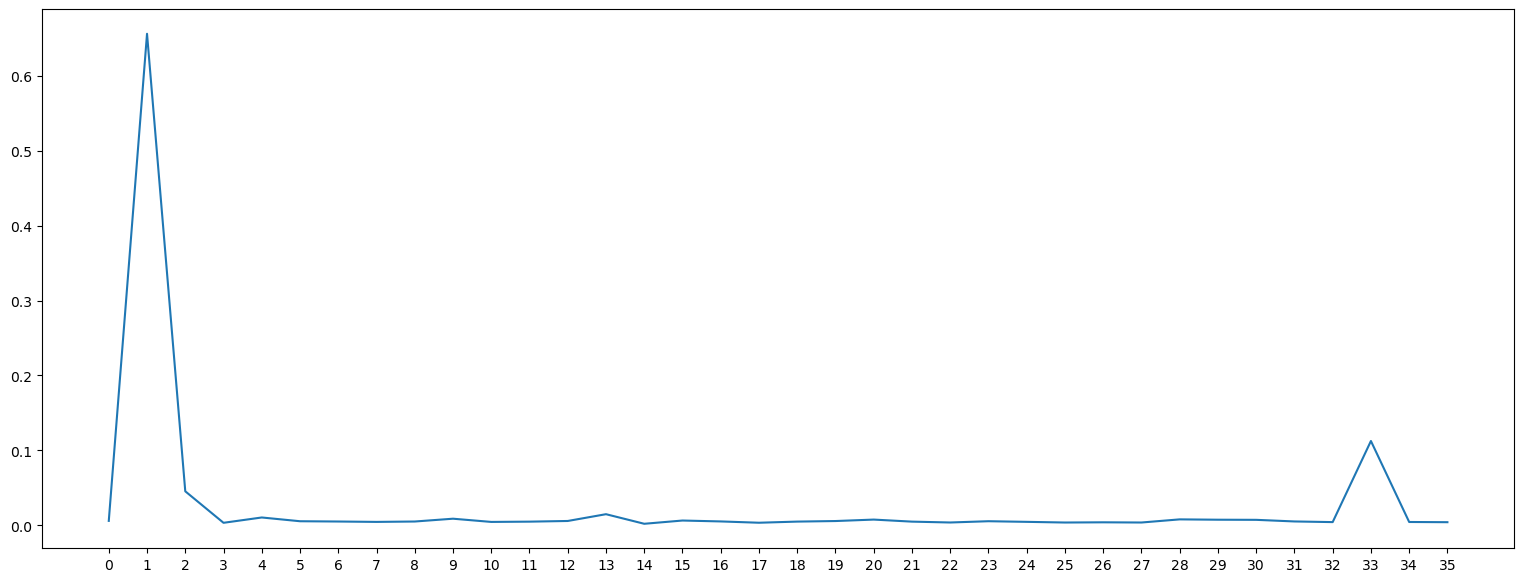

In [93]:
from matplotlib.pyplot import figure
figure(figsize=(19, 7))
plt.plot(imporatnces)
plt.xticks(np.arange(0, 36, step=1))

So the most importance columns are 2, 3, 34. Let's see what are these?

In [94]:
imporatnces = pd.Series(imporatnces)

In [95]:
imporatnces.sort_values(ascending=False, inplace=True)

In [96]:
imporatnces[imporatnces > imporatnces.mean()]

1     0.656002
33    0.112550
2     0.045424
dtype: float64

In [32]:
x_full.columns[[2, 3, 34]]

Index(['O2_2', 'O2_3', 'BOD5_6'], dtype='object')

## Part II

Now I am going to train a Random Forest Regresson with only these three features and let's see how much MSE goes up? This will help to realize the real loss or lack of it by other feautres, maybe we could also combine other features imporatnce and compare but this is more fun.

### 5 Features

In [33]:
minimal_train_data = []
minimal_test_data = []

for i in range(3, 18):
    minimal_inx = np.zeros_like(x_train.columns)
    minimal_inx[imporatnces[:i].index] = 1
    minimal_inx = minimal_inx == 1
    minimal_train_data.append(x_train.iloc[:, minimal_inx])
    minimal_test_data.append(x_test.iloc[:, minimal_inx])

In [34]:
all_features_mse = 1.3228116414285722


for i in range(0, len(minimal_test_data)):
    minimal_rf = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)
    
    
    minimal_rf.fit(minimal_train_data[i], y_train)
    minimal_preds = minimal_rf.predict(minimal_test_data[i])
    mse = mean_squared_error(y_test, minimal_preds)
    print(f'For the {i+3} features the mse is: {mse}')
    print(f'Compare to 36 features mse it is: ')
    print(f'{(all_features_mse-mse)}\n')

For the 3 features the mse is: 1.1878300246751523
Compare to 36 features mse it is: 
0.1349816167534199

For the 4 features the mse is: 1.1770959906579583
Compare to 36 features mse it is: 
0.14571565077061388

For the 5 features the mse is: 1.1590961025967794
Compare to 36 features mse it is: 
0.1637155388317928

For the 6 features the mse is: 1.148240438822547
Compare to 36 features mse it is: 
0.17457120260602532

For the 7 features the mse is: 1.1662657445668452
Compare to 36 features mse it is: 
0.15654589686172704

For the 8 features the mse is: 1.163393580959628
Compare to 36 features mse it is: 
0.15941806046894413

For the 9 features the mse is: 1.1577275767034618
Compare to 36 features mse it is: 
0.1650840647251104

For the 10 features the mse is: 1.15773274612417
Compare to 36 features mse it is: 
0.16507889530440223

For the 11 features the mse is: 1.1472373205941857
Compare to 36 features mse it is: 
0.1755743208343865

For the 12 features the mse is: 1.1438388598226787
C

OK the 36 features version of model had a mse of 1.3228116414285722 and the new (minimal) model has only 1.3232833197493163, only 4 ten-thousandth for 33 extra features. The sweet spot is around 10 features but other than that it would be 5 and 3 features.

### Checking for Outliers

In [35]:
# 5 features

minimal_inx = np.zeros_like(x_train.columns)
minimal_inx[imporatnces[:5].index] = 1
minimal_inx = minimal_inx == 1
five_f = x_train.iloc[:, minimal_inx]

In [36]:
five_f

,O2_1,O2_2,NH4_6,NO3_6,BOD5_5
824,7.700,8.900,0.380,1.730,8.415
931,7.933,8.933,0.280,1.440,5.840
2101,7.100,7.750,0.370,1.730,30.725
3341,9.700,8.100,1.285,2.020,8.415
3209,9.400,8.200,0.280,9.530,8.400
...,...,...,...,...,...
174,8.200,8.900,0.280,2.074,8.415
2078,7.300,8.100,0.380,1.730,6.750
2781,7.500,8.900,0.380,1.730,7.055
558,7.250,7.650,0.429,3.730,5.200


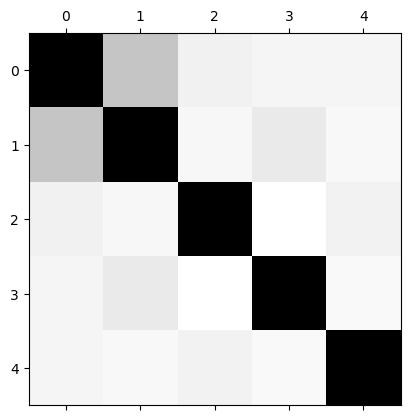

In [37]:
plt.matshow(five_f.corr(), cmap='gray_r')
plt.show()

In [38]:
five_f.describe()

,O2_1,O2_2,NH4_6,NO3_6,BOD5_5
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,8.186012,9.311615,0.468977,3.047607,7.758877
std,2.866504,6.882540,0.314958,2.963170,3.396840
min,0.000000,0.000000,0.052000,0.011000,2.020000
25%,7.100000,7.300000,0.310000,1.420000,5.725000
50%,7.800000,8.300000,0.380000,1.730000,7.400000
75%,9.100000,8.700000,0.429000,3.500000,8.400000
max,46.950000,65.950000,2.680000,19.355000,56.950000


OK there are some jarring outliers, maybe let's get the ratio of how much data is outside of the IQR?

In [45]:
# O21_cutoff = (five_f['O2_1'].quantile(0.9))
# O22_cutoff = (five_f['O2_2'].quantile(0.9))
# NH4_cutoff = (five_f['NH4_6'].quantile(0.9))
# NO3_cutoff = (five_f['NO3_6'].quantile(0.9))
# BOD5_cutoff = (five_f['BOD5_5'].quantile(0.9))

# # Clip the last 10 percentiles

# # TODO test normalization

In [47]:
# print(len(five_f[five_f['O2_1'] <= O21_cutoff])/len(five_f)* 100)
# print(len(five_f[five_f['O2_2'] <= O22_cutoff])/len(five_f)* 100)
# print(len(five_f[five_f['NH4_6'] <= NH4_cutoff])/len(five_f)* 100)
# print(len(five_f[five_f['NO2_2'] <= NO2_cutoff])/len(five_f)* 100)
# print(len(five_f[five_f['BOD5_5'] <= BOD5_cutoff])/len(five_f)* 100)

In [48]:
five_f = five_f.copy()

I don't think this kind of mechanical cut off would be beneficial for anything except for NH4_5 and NO2_2

In [49]:
five_f.describe()

,O2_1,O2_2,NH4_6,NO3_6,BOD5_5
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,8.186012,9.311615,0.468977,3.047607,7.758877
std,2.866504,6.882540,0.314958,2.963170,3.396840
min,0.000000,0.000000,0.052000,0.011000,2.020000
25%,7.100000,7.300000,0.310000,1.420000,5.725000
50%,7.800000,8.300000,0.380000,1.730000,7.400000
75%,9.100000,8.700000,0.429000,3.500000,8.400000
max,46.950000,65.950000,2.680000,19.355000,56.950000


In [ ]:
plt.hist(five_f['O2_1'], alpha=0.4)
plt.hist(five_f['O2_2'], alpha=0.4)
plt.hist(five_f['NH4_6'], alpha=0.4)
plt.hist(five_f['NO2_2'], alpha=0.4)
plt.hist(five_f['BOD5_5'], alpha=0.4)

This is a skewed data, log might help us.

In [ ]:
n_o2 = np.log1p(five_f['O2_1'])

In [ ]:
five_f['O2_1'] = np.log1p(five_f['O2_1'])
five_f['O2_2'] = np.log1p(five_f['O2_2'])
five_f['NH4_6'] = np.log1p(five_f['NH4_6'])
five_f['NO2_2'] = np.log1p(five_f['NO2_2'])
five_f['BOD5_5'] = np.log1p(five_f['BOD5_5'])

In [ ]:
plt.hist(five_f['O2_1'])
plt.hist(five_f['O2_2'])
plt.hist(five_f['NH4_6'])
plt.hist(five_f['NO2_2'])
plt.hist(five_f['BOD5_5'])

In [ ]:
five_f

In [ ]:
nrf_r = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

nrf_r.fit(five_f, y_train)

In [ ]:
five_f_test = minimal_test_data[2]
five_f_test = five_f_test.copy()

In [ ]:
five_f_test['O2_1'] = np.log1p(five_f_test['O2_1'])
five_f_test['O2_2'] = np.log1p(five_f_test['O2_2'])
five_f_test['NH4_6'] = np.log1p(five_f_test['NH4_6'])
five_f_test['NO2_2'] = np.log1p(five_f_test['NO2_2'])
five_f_test['BOD5_5'] = np.log1p(five_f_test['BOD5_5'])

In [ ]:
nrf_r_pred = nrf_r.predict(five_f_test)

In [ ]:
mean_squared_error(y_test, nrf_r_pred)

In [ ]:
five_f_test

In [ ]:
return_five = pd.concat([five_f, five_f_test])

In [ ]:
return_five = return_five.sort_index()

In [ ]:
return_five

In [ ]:
df_ex = df.copy()

In [ ]:
return_five.round(2)

In [ ]:
zero_map = np.zeros(len(df_ex.columns))

In [ ]:
imporatnces[:5]

In [ ]:
zero_map[[1, 2, 3, 34]] = 1

In [ ]:
zero_map = zero_map!=1

In [ ]:
df_ex.iloc[:, zero_map] = 0

In [ ]:
df_ex

In [ ]:
# df_ex.to_csv('sub3.csv', index=False)

## PART III
### Target

Now that we know logarithm doesn't help us that much we have to use clipping. First we start by Target.

In [33]:
print(f'Full range: {y_full.max() - y_full.min()}')
print(f'90th percentile: {y_full.quantile(.9)}')
print(f'10th percentile: {y_full.quantile(.1)}')

Full range: 64.63000000000001
90th percentile: 9.68
10th percentile: 7.12


Let's clip the data outside of 90the and 10th percentiles

In [34]:
clipped_y_agg = y_full.clip(7, 10)
clipped_y = y_full.clip(7, 15)

In [35]:
normal_y = (y_full - y_full.mean()) / y_full.std()

In [36]:
x_train_agg, x_test_agg, y_train_agg, y_test_agg = train_test_split(x_full, clipped_y, test_size=0.2)
x_train_clipped, x_test_clipped, y_train_clipped, y_test_clipped = train_test_split(x_full, clipped_y_agg, test_size=0.2)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_full, normal_y, test_size=0.2)
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(x_full, y_full, test_size=0.2)

In [37]:
five_x_train_agg = x_train_agg.iloc[:, imporatnces[:5].index]
five_x_test_agg = x_test_agg.iloc[:, imporatnces[:5].index]

five_x_train_clipped = x_train_clipped.iloc[:, imporatnces[:5].index]
five_x_test_clipped = x_test_clipped.iloc[:, imporatnces[:5].index]

five_x_train_norm = x_train_norm.iloc[:, imporatnces[:5].index]
five_x_test_norm = x_test_norm.iloc[:, imporatnces[:5].index]

five_x_train_raw = x_train_raw.iloc[:, imporatnces[:5].index]
five_x_test_raw = x_test_raw.iloc[:, imporatnces[:5].index]

In [38]:
agg_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

agg_rfr.fit(five_x_train_agg, y_train_agg)
agg_rfr_pred = agg_rfr.predict(five_x_test_agg)
mean_squared_error(y_test_agg, agg_rfr_pred)

0.8301113375612239

In [39]:
clip_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

clip_rfr.fit(five_x_train_clipped, y_train_clipped)
clip_rfr_pred = clip_rfr.predict(five_x_test_clipped)
mean_squared_error(y_test_clipped, clip_rfr_pred)

0.5213889933209791

In [40]:
norm_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

norm_rfr.fit(five_x_train_norm, y_train_norm)
norm_rfr_pred = norm_rfr.predict(five_x_test_norm)
mean_squared_error(y_test_norm, norm_rfr_pred)

0.29286326771428

In [41]:
raw_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

raw_rfr.fit(five_x_train_raw, y_train_raw)
raw_rfr_pred = raw_rfr.predict(five_x_test_raw)
mean_squared_error(y_test_raw, raw_rfr_pred)

1.7947681435303127

Normalized Target seem to give use the best results

* Aggressive Clipping = 0.7944536347943358
* Clipping = 0.5671247840525266
* Normalized = 0.3590333922067787
* Raw = 1.1812596055750642

-----
Second Time
* Aggressive Clipping (2nd time) = 0.8910968469441664
* Clipping (2nd time) = 0.5401740164556785
* Normalized (2nd time) = 0.3927672782367207
* Raw (2nd time) = 1.3195489301516468

-------
Third Time
* Aggressive Clipping (3rd time) = 0.765122321553859
* Clipping (3rd time) = 0.5357782917713959
* Normalized (3rd time) = 0.3722441788386579
* Raw (3rd time) = 6.395317938850975

Oh wow!
Third time says it all, since all of the values of normalized and clipped data stay around the same value, while the raw data changes frantically. **We have mostly eliminated the volatility of data.** Now we can only focus on clipping and normalization.

Let's check to TODO:

- [x] Look at the big picture.
- [x] Get the data.
- [x] Discover and visualize the data to gain insights.
- [x] Prepare the data for Machine Learning algorithms.
~~- [x] Select a model and train it.~~
~~- [x] Fine-tune your model.~~
- [x] Present your solution.
- [x] Launch, monitor, and maintain your system.

In [42]:
clipped_y_loose = y_full.clip(7, 15)

In [43]:
clipped_y_loose

0       8.59
1       9.10
2       8.21
3       8.39
4       8.07
        ... 
3495    8.08
3496    8.09
3497    9.95
3498    9.52
3499    8.51
Name: target, Length: 3500, dtype: float64

In [44]:
x_train_loose, x_test_loose, y_train_loose, y_test_loose = train_test_split(x_full, clipped_y_loose, test_size=0.2)
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_full, normal_y, test_size=0.2)

In [45]:
five_x_train_loose = x_train_loose.iloc[:, imporatnces[:5].index]
five_x_test_loose = x_test_loose.iloc[:, imporatnces[:5].index]

five_x_train_norm = x_train_norm.iloc[:, imporatnces[:5].index]
five_x_test_norm = x_test_norm.iloc[:, imporatnces[:5].index]

In [46]:
y_train_loose

1836     8.10
1596     9.41
2962     7.29
2160    15.00
430      8.11
        ...  
3179     8.05
1725     7.11
1798     8.64
2353     9.08
316     15.00
Name: target, Length: 2800, dtype: float64

In [47]:
five_x_train_loose

,O2_1,O2_2,NO2_2,O2_4,O2_7
1836,8.600,8.60,0.038,9.265,7.150
1596,7.700,7.40,0.027,6.025,7.025
2962,6.630,6.63,0.034,9.265,7.150
2160,13.500,14.70,0.095,8.370,5.030
430,7.500,8.50,0.080,9.115,6.375
...,...,...,...,...,...
3179,7.050,8.65,0.025,7.700,6.375
1725,7.100,7.30,0.046,6.625,7.150
1798,8.025,8.30,0.044,6.025,8.150
2353,8.600,8.10,0.058,9.260,7.170


In [48]:
loose_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

loose_rfr.fit(five_x_train_loose, y_train_loose)
loose_rfr_pred = loose_rfr.predict(five_x_test_loose)
mean_squared_error(y_test_loose, loose_rfr_pred)

0.8621810580152994

In [49]:
norm_rfr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

norm_rfr.fit(five_x_train_norm, y_train_norm)
norm_rfr_pred = norm_rfr.predict(five_x_test_norm)
mean_squared_error(y_test_norm, norm_rfr_pred)

0.5200977123744936

Most of the times normal seems to outperform the loose clipping

In [50]:
normal_y

0       0.061603
1       0.332058
2      -0.139912
3      -0.044458
4      -0.214155
          ...   
3495   -0.208852
3496   -0.203549
3497    0.782816
3498    0.554786
3499    0.019179
Name: target, Length: 3500, dtype: float64

In [51]:
x_pass = x_full.iloc[:, imporatnces[:4].index]

In [52]:
df_ex = df.copy()

In [53]:
df_ex[:] = 0
df_ex

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_2336/2459347210.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ex[:] = 0


,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_ex[x_pass.columns] = x_pass

In [65]:
df_ex

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,0,9.265,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,9.10,13.533,40.900,0,9.265,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,8.21,3.710,5.420,0,9.265,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,8.39,8.700,8.100,0,9.200,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,8.07,8.050,8.650,0,9.265,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,8.08,6.250,8.300,0,9.265,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,8.09,6.630,6.630,0,7.600,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,0,9.95,8.367,8.433,0,6.170,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3498,0,9.52,10.000,6.630,0,9.265,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df_ex['target'] = normal_y

In [57]:
df_ex.to_csv('submissions/sub3.csv', index=False)

In [67]:
df_ex['target'] = clipped_y_agg

In [77]:
clipp17 = y_full.clip(7, 17)

In [78]:
# df_ex['target'] = clipp17
# df_ex.target.max()

17.0

In [79]:
# df_ex.to_csv('sub8-clip_t.csv', index=False)

## Part IV: Clip/Normalize Everything TL;DR Didn't work

In [60]:
x_pass.columns

Index(['O2_1', 'O2_2', 'NO2_2', 'O2_4'], dtype='object')

In [61]:
o21 = x_pass.iloc[:, 0]
o22 = x_pass.iloc[:, 1]
bod5 = x_pass.iloc[:, 2]
nh4 = x_pass.iloc[:, 3]

In [229]:
o21.name

'O2_1'

In [132]:
def clip_analysis(colu, p_low=.01, p_high =.99):

    print(f'CLIPPING ANALYSIS FOR {colu.name}')
    p99 = np.round(colu.quantile(p_high))
    print(f'{p_high * 100}th percentile: {p99}')

    p1 = np.floor(colu.quantile(p_low))
    print(f'{p_low * 100}st percentile: {p1}')

    z = np.abs(colu[colu< p1]-p1)
    print(f'Lower end loss: {np.sum(z)}')

    z = np.abs(colu[colu> p99]-p99)
    print(f'Higher end loss: {np.sum(z)}\n####\n')

    colu[(colu> p1)&(colu<p99)].hist(legend=True)

CLIPPING ANALYSIS FOR O2_1
99th percentile: 15.0
1st percentile: 4.0
Lower end loss: 22.63
Higher end loss: 529.883
####



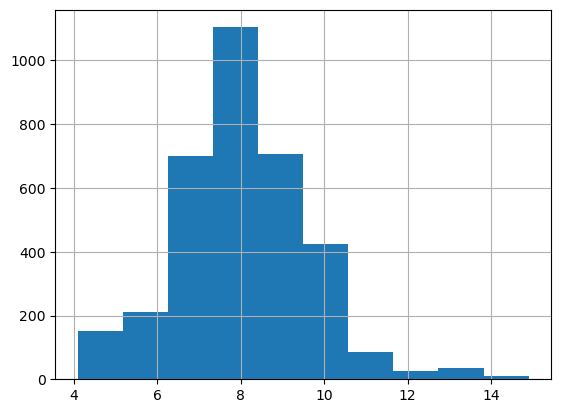

In [233]:
clip_analysis(ohist)

CLIPPING ANALYSIS FOR O2_1
99th percentile: 15.0
1st percentile: 4.0
Lower end loss: 22.63
Higher end loss: 529.883
####



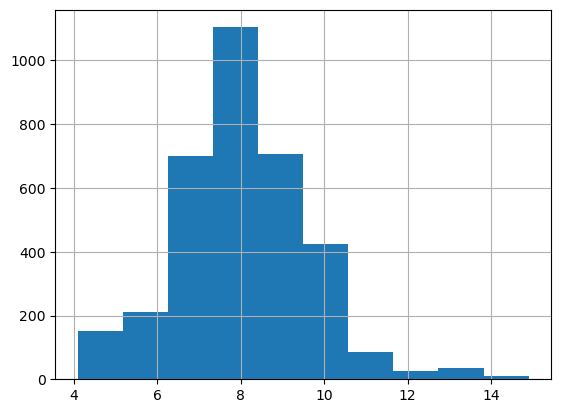

CLIPPING ANALYSIS FOR O2_2
99th percentile: 41.0
1st percentile: 4.0
Lower end loss: 16.997
Higher end loss: 62.15000000000001
####



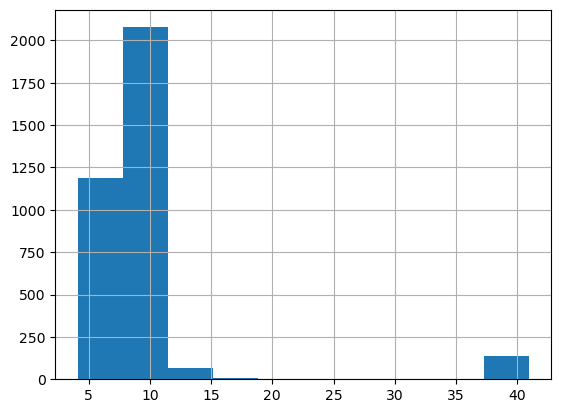

CLIPPING ANALYSIS FOR BOD5_5
99th percentile: 27.0
1st percentile: 4.0
Lower end loss: 41.45799999999999
Higher end loss: 127.50500000000004
####



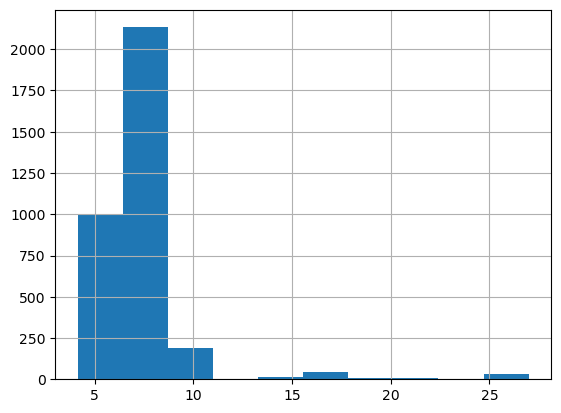

CLIPPING ANALYSIS FOR NH4_6
99th percentile: 1.0
1st percentile: 0.0
Lower end loss: 0.0
Higher end loss: 121.906
####



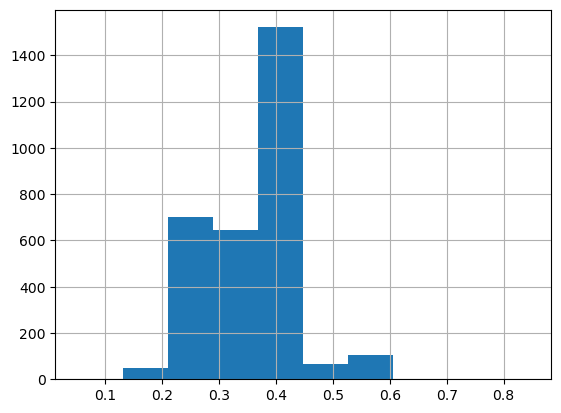

In [237]:
for i in x_pass.columns:
    clip_analysis(x_pass[i])
    plt.show()

In [240]:
x_clipped = x_pass.copy()

In [243]:
x_clipped.columns

Index(['O2_1', 'O2_2', 'BOD5_5', 'NH4_6'], dtype='object')

In [244]:
x_clipped['O2_1'] = x_clipped['O2_1'].clip(4, 15)
x_clipped['O2_2'] = x_clipped['O2_2'].clip(4, 41)
x_clipped['BOD5_5'] = x_clipped['BOD5_5'].clip(4, 27)
x_clipped['NH4_6'] = x_clipped['NH4_6'].clip(0, 1)

In [245]:
x_clipped

,O2_1,O2_2,BOD5_5,NH4_6
0,7.500,9.000,16.645,1.000
1,13.533,40.900,5.725,0.280
2,4.000,5.420,6.750,0.380
3,8.700,8.100,8.670,1.000
4,8.050,8.650,8.400,0.280
...,...,...,...,...
3495,6.250,8.300,7.695,0.429
3496,6.630,6.630,8.415,1.000
3497,8.367,8.433,8.400,0.310
3498,10.000,6.630,6.750,1.000


In [247]:
x_clipped = x_clipped.round(2)

In [248]:
df_ex[x_clipped.columns] = x_clipped

In [251]:
df_ex

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.50,9.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.64,0,0
1,0,9.10,13.53,40.90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.72,0,0
2,0,8.21,4.00,5.42,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.75,0,0
3,0,8.39,8.70,8.10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.67,0,0
4,0,8.07,8.05,8.65,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.40,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,8.08,6.25,8.30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.70,0,0
3496,0,8.09,6.63,6.63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.41,0,0
3497,0,9.95,8.37,8.43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.40,0,0
3498,0,9.52,10.00,6.63,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.75,0,0


In [253]:
df_ex.to_csv('sub5-all-clip.csv', index=False)

## PART V: COMPARE CLIPS

I still think we have to analyse 5 feature model more and compare clipping ranges.

CLIPPING ANALYSIS FOR target
95.0th percentile: 11.0
5.0st percentile: 6.0
Lower end loss: 82.64999999999999
Higher end loss: 418.46000000000004
####



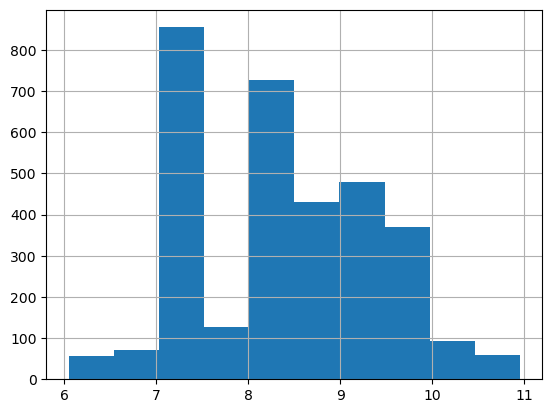

In [63]:
clip_analysis(y_full, p_low=.05, p_high =.95)

CLIPPING ANALYSIS FOR target
90.0th percentile: 10.0
10.0st percentile: 7.0
Lower end loss: 231.97000000000003
Higher end loss: 614.27
####



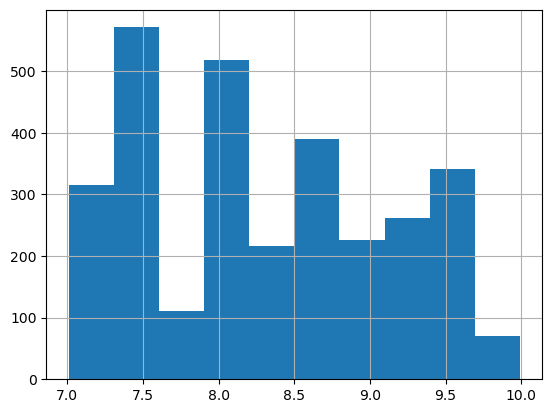

In [64]:
clip_analysis(y_full, p_low=.1, p_high =.9)

In [286]:
clipped_y_iqr = y_full.clip(7, 9) # For IQR percent
clipped_y15 = y_full.clip(7, 10) # For 15 percent
clipped_y10 = y_full.clip(6, 11) # For 10 percent
clipped_y5 = y_full.clip(5, 11) # For 5 percent
clipped_y2 = y_full.clip(5, 16) # For 2 percent

In [287]:
x_train_c_iqr, x_test_c_iqr, y_train_c_iqr, y_test_c_iqr = train_test_split(x_clipped, clipped_y_iqr, test_size=0.2)
x_train_c15, x_test_c15, y_train_c15, y_test_c15 = train_test_split(x_clipped, clipped_y15, test_size=0.2)
x_train_c10, x_test_c10, y_train_c10, y_test_c10 = train_test_split(x_clipped, clipped_y10, test_size=0.2)
x_train_c5, x_test_c5, y_train_c5, y_test_c5 = train_test_split(x_clipped, clipped_y5, test_size=0.2)
x_train_c2, x_test_c2, y_train_c2, y_test_c2 = train_test_split(x_clipped, clipped_y2, test_size=0.2)

In [274]:
rfr_clipped_10 = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rfr_clipped_10.fit(x_train_c10, y_train_c10)
rfr_clipped_10_pred = rfr_clipped_10.predict(x_test_c10)
mean_squared_error(y_test_c10, rfr_clipped_10_pred)

0.7281659216668053

In [276]:
rfr_clipped_5 = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rfr_clipped_5.fit(x_train_c5, y_train_c5)
rfr_clipped_5_pred = rfr_clipped_5.predict(x_test_c5)
mean_squared_error(y_test_c5, rfr_clipped_5_pred)

0.763762613056037

In [277]:
rfr_clipped_2 = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rfr_clipped_2.fit(x_train_c2, y_train_c2)
rfr_clipped_2_pred = rfr_clipped_2.predict(x_test_c2)
mean_squared_error(y_test_c2, rfr_clipped_2_pred)

1.105122554808914

In [281]:
rfr_clipped_15 = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rfr_clipped_15.fit(x_train_c15, y_train_c15)
rfr_clipped_15_pred = rfr_clipped_15.predict(x_test_c15)
mean_squared_error(y_test_c15, rfr_clipped_15_pred)

0.5395887953158884

In [288]:
rfr_clipped_iqr = RandomForestRegressor(
       n_estimators=1000,
       max_depth=7,
       n_jobs=-1,
       random_state=42)

rfr_clipped_iqr.fit(x_train_c_iqr, y_train_c_iqr)
rfr_clipped_iqr_pred = rfr_clipped_iqr.predict(x_test_c_iqr)
mean_squared_error(y_test_c_iqr, rfr_clipped_iqr_pred)

0.33495876494678833

OK the interquartile range is the best for clipping the outliers.

In [290]:
df_ex['target'] = clipped_y_iqr
df_ex.to_csv('sub6-iqr.csv', index=False)

**KAGGLE GAVE: 1.8 which is bad**

The best score which 1.35 was attained by `clipped_y_loose = y_full.clip(7, 15)`

In [97]:
imporatnces[:5]

1     0.656002
33    0.112550
2     0.045424
13    0.014867
4     0.010481
dtype: float64

In [103]:
columns = imporatnces[:5].index + 1

In [105]:
x_pass_2 = df.iloc[:, columns]

In [118]:
clip_analysis??

Signature: clip_analysis(colu, p_low=0.01, p_high=0.99)
Docstring: <no docstring>
Source:   
def clip_analysis(colu, p_low=.01, p_high =.99):

    print(f'CLIPPING ANALYSIS FOR {colu.name}')
    p99 = np.round(colu.quantile(p_high))
    print(f'{p_high * 100}th percentile: {p99}')

    p1 = np.floor(colu.quantile(p_low))
    print(f'{p_low * 100}st percentile: {p1}')

    z = np.abs(colu[colu< p1]-p1)
    print(f'Lower end loss: {np.sum(z)}')

    z = np.abs(colu[colu> p99]-p99)
    print(f'Higher end loss: {np.sum(z)}\n####\n')

    colu[(colu> p1)&(colu<p99)].hist()
File:      /var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_2336/2885431343.py
Type:      function

CLIPPING ANALYSIS FOR O2_1
99.0th percentile: 15.0
1.0st percentile: 4.0
Lower end loss: 22.63
Higher end loss: 529.883
####

CLIPPING ANALYSIS FOR BOD5_5
99.0th percentile: 27.0
1.0st percentile: 4.0
Lower end loss: 41.45799999999999
Higher end loss: 127.50500000000004
####

CLIPPING ANALYSIS FOR O2_2
99.0th percentile: 41.0
1.0st percentile: 4.0
Lower end loss: 16.997
Higher end loss: 62.15000000000001
####

CLIPPING ANALYSIS FOR NH4_6
99.0th percentile: 1.0
1.0st percentile: 0.0
Lower end loss: 0.0
Higher end loss: 121.906
####

CLIPPING ANALYSIS FOR O2_4
99.0th percentile: 11.0
1.0st percentile: 5.0
Lower end loss: 12.819999999999997
Higher end loss: 128.275
####



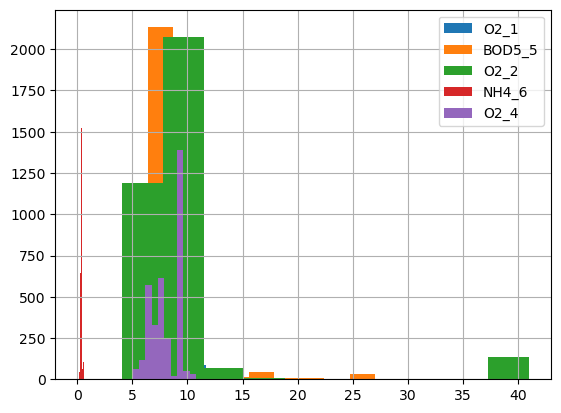

In [134]:
for i in x_pass_2:
    clip_analysis(x_pass_2[i],p_low=.01, p_high=.99)

In [157]:
df_ex = df.copy()

In [159]:
df_ex[:] =0

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_2336/4048276789.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ex[:] =0


In [160]:
df_ex

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
df_ex['O2_1'] = x_pass_2['O2_1'].clip(4, 15)
df_ex['BOD5_5'] = x_pass_2['BOD5_5'].clip(4, 27)
df_ex['O2_2'] = x_pass_2['O2_2'].clip(4, 41)
df_ex['NH4_6'] = x_pass_2['NH4_6'].clip(0, 1)
# df_ex['O2_4'] = x_pass_2['O2_4'].clip(5, 11)

In [162]:
df_ex.target = df.target.clip(7, 16)

In [152]:
df_ex['O2_4'] = 0

In [163]:
df_ex.to_csv('sub10-4f.csv', index=False)

In [164]:
df_ex

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.645,0,0
1,0,9.10,13.533,40.900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.725,0,0
2,0,8.21,4.000,5.420,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0
3,0,8.39,8.700,8.100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.670,0,0
4,0,8.07,8.050,8.650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,8.08,6.250,8.300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.695,0,0
3496,0,8.09,6.630,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.415,0,0
3497,0,9.95,8.367,8.433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
3498,0,9.52,10.000,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0


## PART VI

Let's get the final data sets one with target.clip(7, 16) and other with same target and log of independent variables and other with same x and target at 7 to 15

In [172]:
df_ex = df.copy()

In [173]:
df_ex[:] = 0

/var/folders/lb/05l0197j4wdgmqspj9s7bgjc0000gn/T/ipykernel_2336/1214198663.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_ex[:] = 0


In [183]:
x_pass_2 = x_pass_2.drop('O2_4', axis=1)

In [217]:
df_ex[x_pass_2.columns] = x_pass_2

In [218]:
df_ex['target'] = df.target.clip(7, 16)
df_ex

,id,target,O2_1,O2_2,O2_3,O2_4,O2_5,O2_6,O2_7,NH4_1,...,NO3_5,NO3_6,NO3_7,BOD5_1,BOD5_2,BOD5_3,BOD5_4,BOD5_5,BOD5_6,BOD5_7
0,0,8.59,7.500,9.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,16.645,0,0
1,0,9.10,13.533,40.900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.725,0,0
2,0,8.21,3.710,5.420,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0
3,0,8.39,8.700,8.100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.670,0,0
4,0,8.07,8.050,8.650,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0,8.08,6.250,8.300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.695,0,0
3496,0,8.09,6.630,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.415,0,0
3497,0,9.95,8.367,8.433,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.400,0,0
3498,0,9.52,10.000,6.630,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6.750,0,0


In [219]:
df_ex.to_csv('sub11_7-16.csv', index=False)

In [220]:
x_pass_2_log = np.log1p(x_pass_2)

In [221]:
df_log = df_ex.copy()
df_log[x_pass_2_log.columns] = x_pass_2_log

In [222]:
x_pass_2_log_selective = x_pass_2.copy()

In [224]:
x_pass_2_log_selective['BOD5_5'] = np.log1p(x_pass_2_log_selective['BOD5_5'])
x_pass_2_log_selective['O2_2'] = np.log1p(x_pass_2_log_selective['O2_2'])

In [227]:
df_log.target = df.target.clip(7, 15)
df_ex.target = df.target.clip(7, 15)

In [228]:
df_sel = df_ex.copy()
df_log[x_pass_2_log_selective.columns] = x_pass_2_log_selective

In [230]:
dfs = [df_ex, df_log, df_sel]

In [229]:
x_train, x_test, y_train, y_test = train_test_split(df_ex.drop('target', axis=1), df_ex['target'], test_size=0.2)
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(df_log.drop('target', axis=1), df_ex['target'], test_size=0.2)
x_train_sel, x_test_sel, y_train_sel, y_test_sel = train_test_split(df_sel.drop('target', axis=1), df_ex['target'], test_size=0.2)

In [ ]:
# Although we don't make any changes to dependent variable we still have to use each set's own y because of shuffle.

In [235]:
for j in range(5):
    for i in range(0, 3):
        x_t, x_v, y_t, y_v = train_test_split(dfs[i].drop('target', axis=1), dfs[i].target, test_size=0.2)

        rfr = RandomForestRegressor(
           n_estimators=1000,
           max_depth=7,
           n_jobs=-1,
           random_state=42)

        rfr.fit(x_t, y_t)
        rfr_pred = rfr.predict(x_v)
        print(mean_squared_error(y_v, rfr_pred))
        print()
    print()



0.8907376319892707

0.7680415884873414

0.8160328322752202


0.7169211936651716

0.7471805035414959

0.8814255678342398


0.877492874047788

0.7274140962410937

0.7680976010666971


0.8781223619061647

0.9870677380109084

0.826863221289919


0.9461849409754419

0.8710030333851491

0.913103666773789


